In [1]:
from models.pet_skipgram.preprocessing.tokenizer import PetTokenizer
from models.pet_skipgram.pet_skipgram import PetSkipGramModel
from models.dataset import WordToVecDataset
from infra.train.trainer import PetSkipGramTrainer
from infra.train.texts import Text
import torch
import numpy as np

In [2]:
text = Text(path = "/home/aluatar/ml/pet-text-similarity/data/full_hobbit.txt")
vocab = text.words

In [3]:
pet_skip_gram = PetSkipGramModel(vocabulary=vocab, temerature=0.9)
wiki_data = WordToVecDataset(
    text=text, 
    vocabulary=pet_skip_gram.vocabulary, 
    word_idx_dict=pet_skip_gram.word_idx_dict,
    idx_word_dict=pet_skip_gram.idx_word_dict,
    window_size=2
)

Model passed to CUDA device NVIDIA GeForce GTX 1650


In [4]:
pet_skip_gram.vocab_size, torch.cuda.is_available()

(7341, True)

In [5]:
trainer = PetSkipGramTrainer(
    model=pet_skip_gram,
    loss=torch.nn.NLLLoss,
    training_data=wiki_data,
    learning_rate=0.05,
    epoches=20,
    batch_size=1
)

In [6]:
trainer.train()

100%|██████████| 386386/386386 [12:04<00:00, 533.17it/s]


Epoch: 1, Loss: 2647906.3995822594


100%|██████████| 386386/386386 [11:47<00:00, 546.29it/s]


Epoch: 2, Loss: 2499150.4512805194


100%|██████████| 386386/386386 [11:38<00:00, 553.12it/s]


Epoch: 3, Loss: 2447066.398141101


100%|██████████| 386386/386386 [11:45<00:00, 547.80it/s]


Epoch: 4, Loss: 2410819.5198723897


100%|██████████| 386386/386386 [11:45<00:00, 547.36it/s]


Epoch: 5, Loss: 2383322.677821383


100%|██████████| 386386/386386 [11:50<00:00, 543.55it/s]


Epoch: 6, Loss: 2361002.742826566


100%|██████████| 386386/386386 [11:58<00:00, 537.61it/s]


Epoch: 7, Loss: 2341962.058112815


 20%|█▉        | 76816/386386 [02:35<10:26, 494.10it/s]


KeyboardInterrupt: 

Text(0, 0.5, 'Loss')

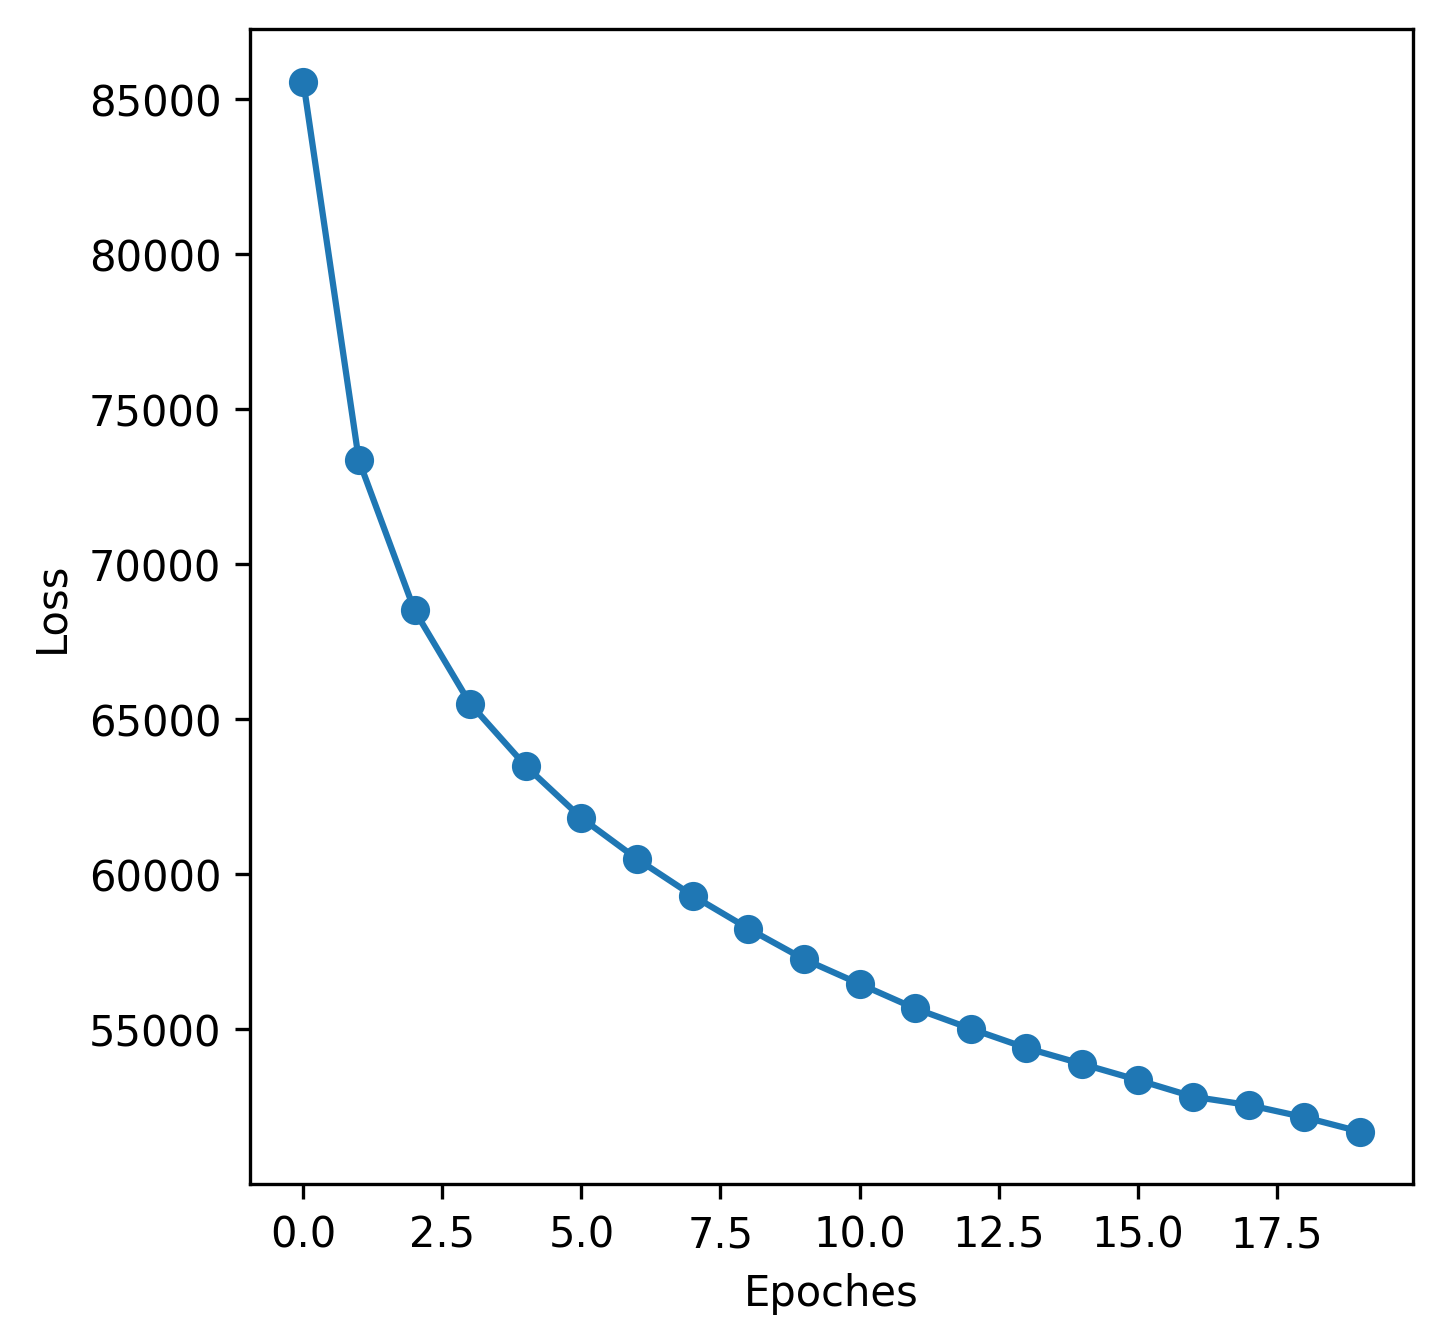

In [6]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5,5), dpi=300)

ax = fig.add_subplot(111)

ax.scatter(trainer.convergece.keys(), trainer.convergece.values())
ax.plot(trainer.convergece.keys(), trainer.convergece.values())

ax.set_xlabel("Epoches")
ax.set_ylabel("Loss")

In [40]:
cossim_map = []

for w1 in pet_skip_gram.words_embedding_dict.keys():
    e1 = pet_skip_gram.words_embedding_dict[w1]
    e1 = e1 / np.linalg.norm(e1)
    _raw = []
    
    for w2 in pet_skip_gram.words_embedding_dict.keys():
        e2 = pet_skip_gram.words_embedding_dict[w2]
        e2 = e2 / np.linalg.norm(e2)
        _raw.append(e1.dot(e2))
    cossim_map.append(_raw)

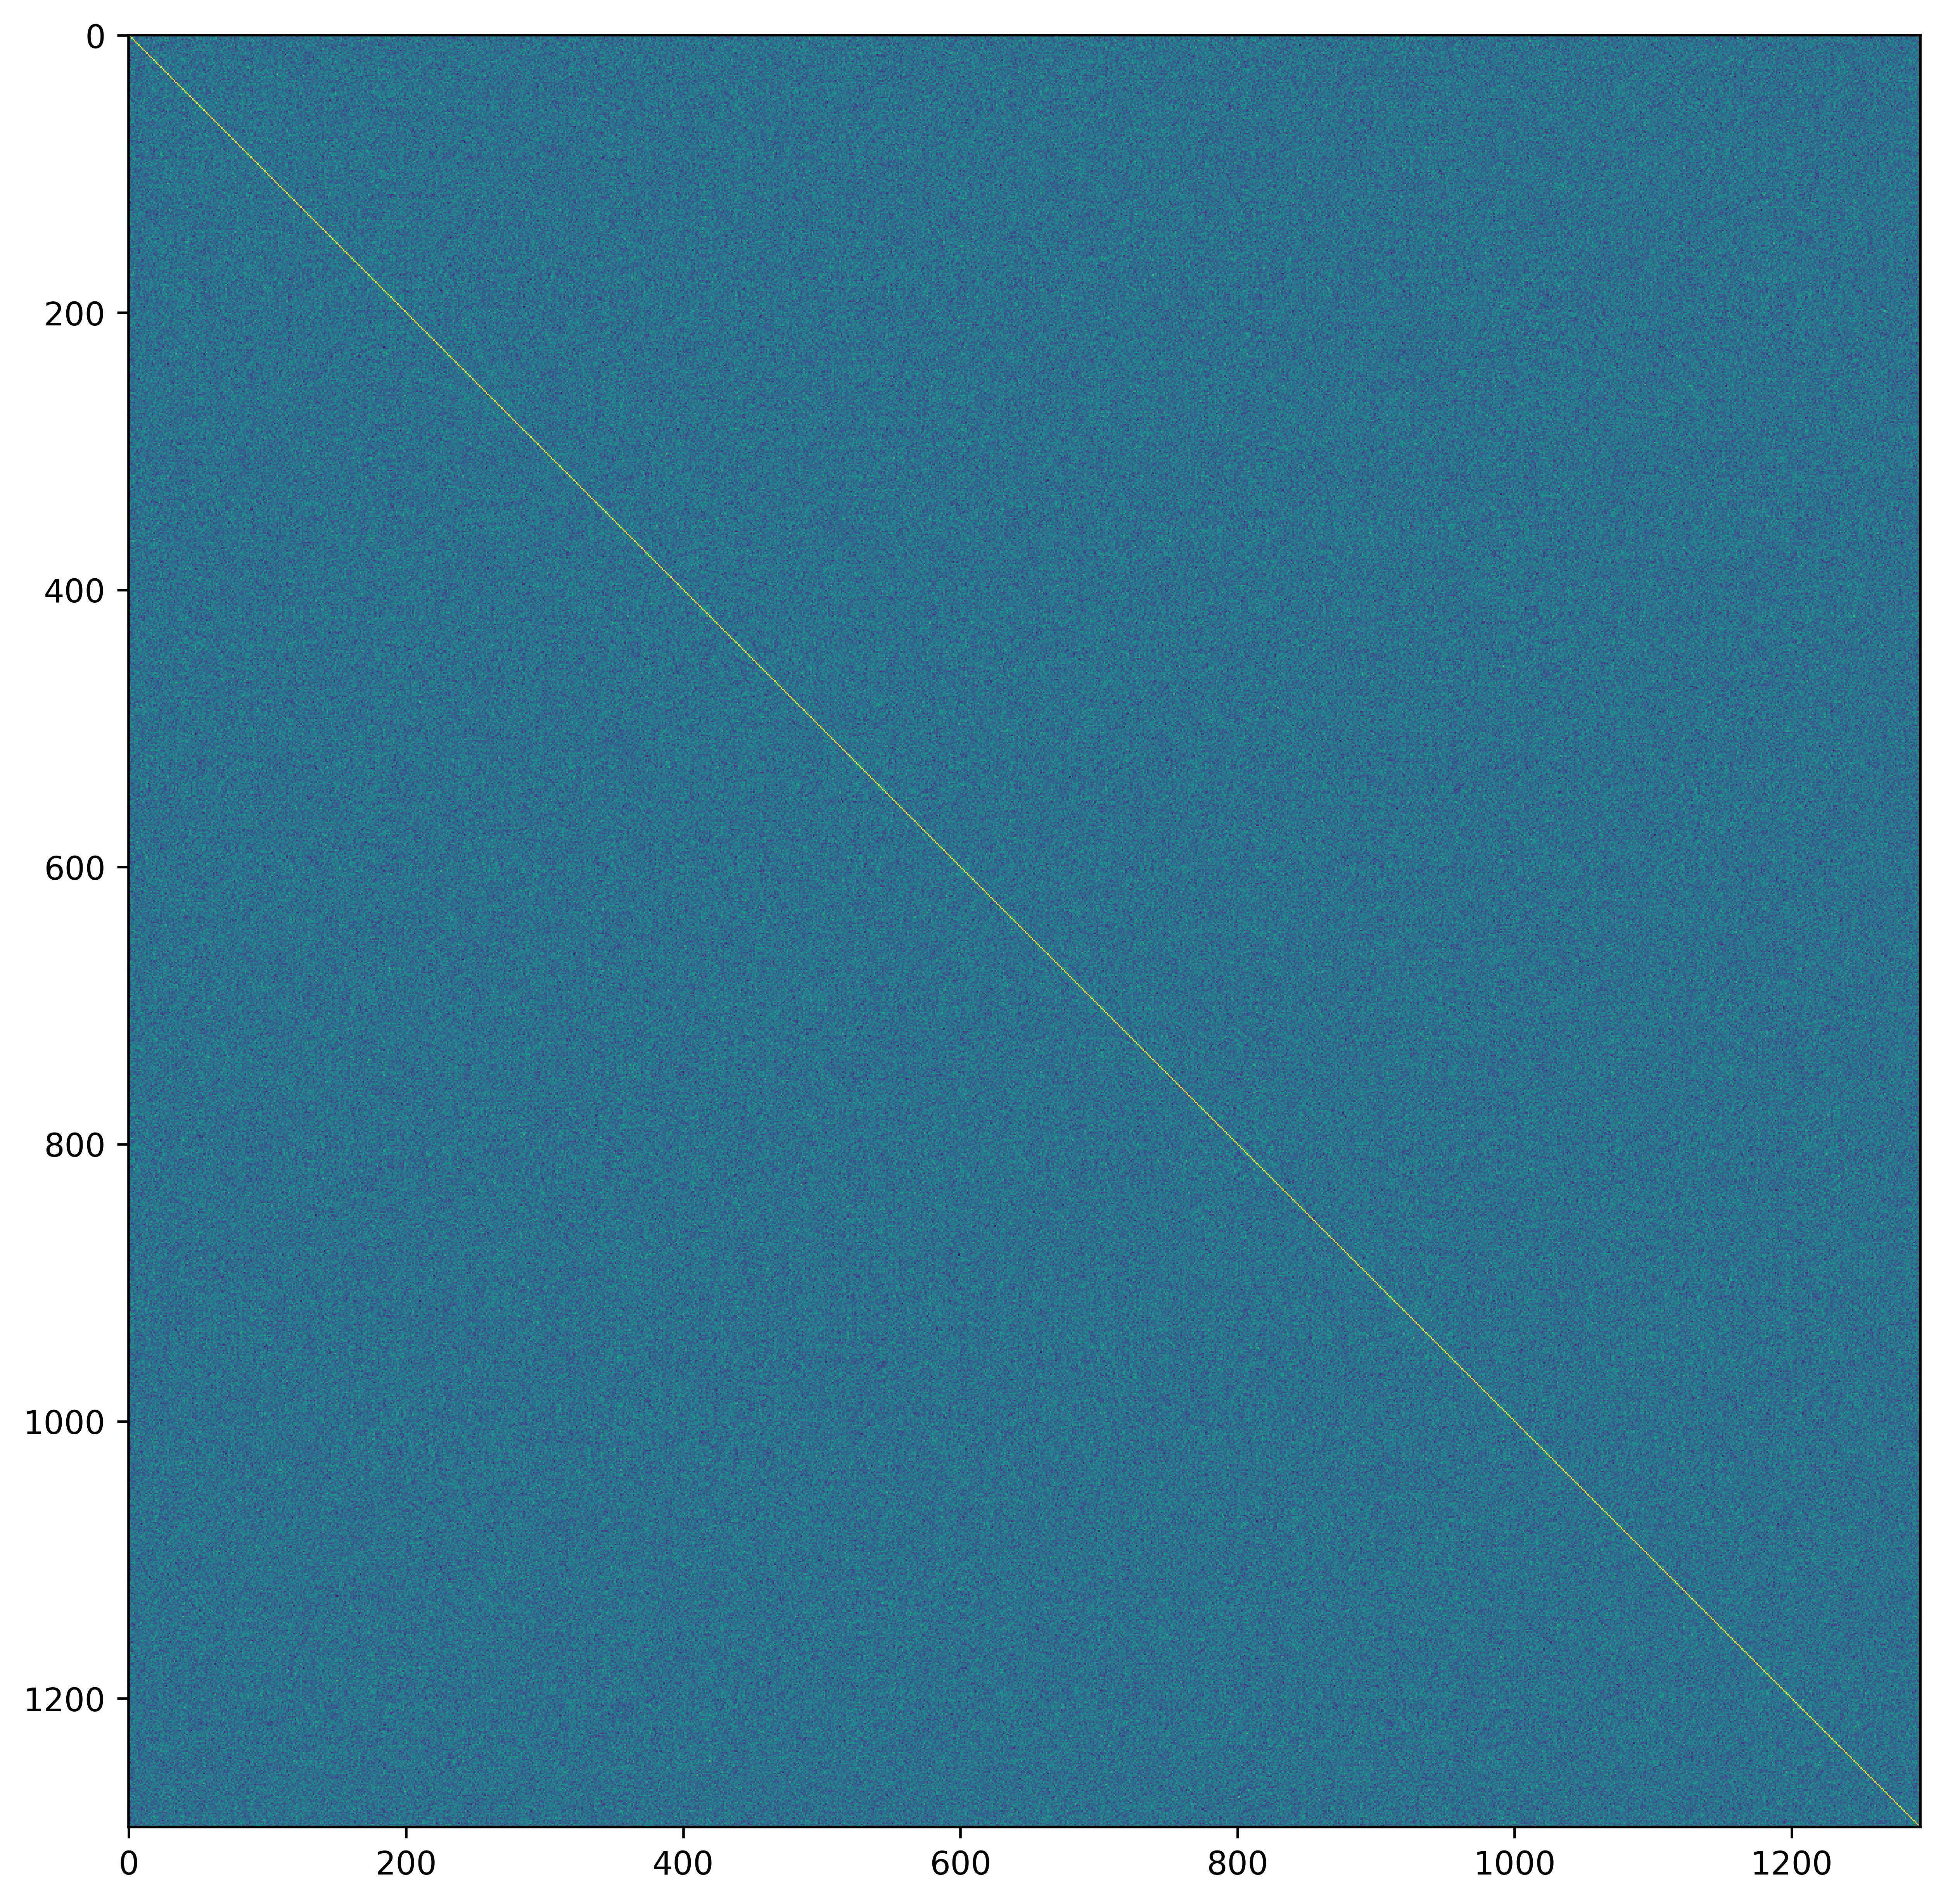

In [53]:
fig = plt.figure(figsize=(10,10), dpi=600)

ax = fig.add_subplot(111)

ax.imshow(cossim_map)